# 0. Import packages

In [ ]:
import os
%matplotlib widget
from dtscalibration import read_silixa_files
import matplotlib.pyplot as plt
import warnings
import glob
import dtscalibration

import numpy as np
import pandas as pd
import scipy.stats as st 
from scipy import signal
import scipy
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import os
import warnings

from dtscalibration import read_silixa_files
from dtscalibration.dts_accessor_utils import (
    suggest_cable_shift_double_ended,
    shift_double_ended,
)
from dtscalibration.variance_stokes import variance_stokes_constant, variance_stokes_linear, variance_stokes_exponential
warnings.simplefilter("ignore")  # Hide warnings to avoid clutter in the notebook

# 1. Load temp files

In [6]:
all_ds = {}

for i in glob.glob('../Antarctica_DTS_allData/files_sorted_by_borehole/*'):

    ds = dtscalibration.read_silixa_files(
        directory=i,
        timezone_netcdf='UTC',
        file_ext='*.xml')
    

    # fig,ax = plt.subplots()
    # # ax.plot(ds.x, ds.dts.st)
    # ax.plot(ds.x, ds.dts.st)
    # ax.set_title(i[-12:])

    # ax1 = ax.twinx()
    # ax1.plot(ds.x, ds.tmp)
    # ax1.set_ylim([-35,-25])

    all_ds[i[-12:]] = ds

3 files were found, each representing a single timestep
6 recorded vars were found: LAF, ST, AST, REV-ST, REV-AST, TMP
Recorded at 3553 points along the cable
The measurement is double ended
Reading the data from disk
12 files were found, each representing a single timestep
6 recorded vars were found: LAF, ST, AST, REV-ST, REV-AST, TMP
Recorded at 3537 points along the cable
The measurement is double ended
Reading the data from disk
92 files were found, each representing a single timestep
6 recorded vars were found: LAF, ST, AST, REV-ST, REV-AST, TMP
Recorded at 3537 points along the cable
The measurement is double ended
Reading the data from disk
31 files were found, each representing a single timestep
6 recorded vars were found: LAF, ST, AST, REV-ST, REV-AST, TMP
Recorded at 3537 points along the cable
The measurement is double ended
Reading the data from disk
2 files were found, each representing a single timestep
6 recorded vars were found: LAF, ST, AST, REV-ST, REV-AST, TMP
Record

# 2. Define the borehole depths
### maually identified from the profiles

In [ ]:
borehole_depths = {
    'ALHIC1901_22': [161, 314],
    'ALHIC1901_23': [170.7, 311.74],
    'ALHIC1901_24': [170.7, 312.3],
    'ALHIC1902_23': [104.5, 312.1],
    'ALHIC1903_23': [163.8, 311.7],
    'ALHIC2201_23': [220.3, 311.7],
    'ALHIC2301_23': [220.8, 312.03],
    'ALHIC2301_24': [220, 312.3],
    'ALHIC2302_24': [99, 312.3],
    'ALHIC2401_24': [220.27, 312.3],
}

boreholes = ['ALHIC1901', 'ALHIC1902', 'ALHIC1903', 'ALHIC2201', 'ALHIC2301', 'ALHIC2302', 'ALHIC2401']

# 3. Plot boreholes

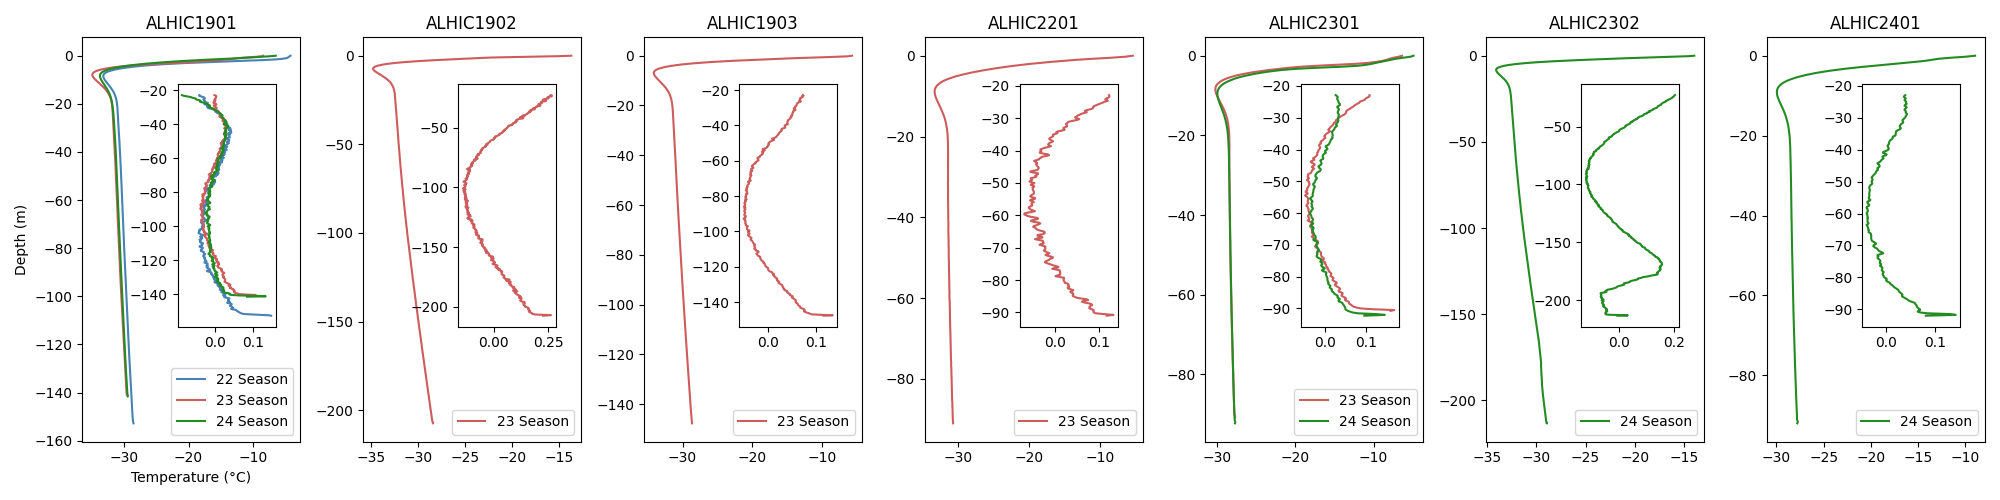

In [52]:
fig,axes = plt.subplots(1, len(boreholes), figsize=(20, 5))

insets = []
for ax in axes:
    axinses = inset_axes(ax, width = "100%", height = "100%", loc='lower right', bbox_to_anchor=(.5, .25, .45, .60), bbox_transform=ax.transAxes, borderpad=1)
    insets.append(axinses)
for i in all_ds:
    z1, z2 = borehole_depths[i]
    if i == 'ALHIC1901_24':
        ds = all_ds[i].isel(time=list(np.arange(2,len(ds),1)))
    else:
        ds = all_ds[i]
    
    for borehole, ax, axins in zip(boreholes, axes, insets):

        if i.startswith(borehole):
            depth = ds.sel(x=slice(z1, z2)).x - ds.sel(x=slice(z1, z2)).x[0]
            temp = ds.sel(x=slice(z1, z2)).tmp
            temp_avg = np.mean(temp, axis=1)
            if i[-2:] == '22':
                c = 'steelblue'
            elif i[-2:] == '23':
                c = 'indianred'
            elif i[-2:] == '24':
                c = 'forestgreen'
            ax.plot(temp_avg, depth*-1, label=i[-2:]+' Season',c=c)
            axins.plot(signal.detrend(temp_avg[90:]), depth[90:]*-1, label=i[-2:]+' Season',c=c)
            ax.legend()

            ax.set_title(borehole)


axes[0].set_ylabel('Depth (m)')
axes[0].set_xlabel('Temperature (°C)')

plt.tight_layout()
    
    
plt.savefig('Fig2.png', dpi=300, bbox_inches='tight')